<a href="https://colab.research.google.com/github/POS-Cross/Bravo-EDA/blob/alaa/bravo_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bravo Supermartk Exploratory Data Analysis notebook

---

## Business Opportunity:

---
This project aims to develop a cross-selling recommander system that helps Bravo employees to offer a special cross-selling for their customers. The recommender system should predict the customers’ interests and recommend for them related products to buy as a package using Cross-selling marketing technique. Such products generally belong to different product categories but will be complementary. For example,  **“Eggs 30 Pcs”** with  **“Abu Eta Noodles 200G”**, or **“Al - Junaidi Milk Milk Long Life 1L”**.

**Cross-selling product recommendation API** would help in:
* Increases customer retention.
* Increases average order value and lifetime value.
* Maintaining market share.
* Add a competitive advantage.
* Attract more customers. 


---


## Business Objectives
* **BO-1:**  Enhancing the competitive position, maintaining and increasing the market share.
* **BO-2:** Classify customers per selling quantities and work on 20/80 role.
* **BO-3:** This system will decrease 75% of expiry date quantities.
* **BO-4:** This system will increase the efficiency of cross-selling offers. 
* **BO-5:** Reducing lost applications with no more than 0.001%  following the initial release.
* **BO-6:** Increase Bravo’s market share.
* **BO-7:** Increase customer loyalty and satisfaction.

# **Table Of Contents**

---



>[Bravo Supermartk Exploratory Data Analysis notebook](#scrollTo=YQYmSCxzyUtz)

>>[Business Opportunity:](#scrollTo=YQYmSCxzyUtz)

>>[Business Objectives](#scrollTo=YQYmSCxzyUtz)

>[Table Of Contents](#scrollTo=d7nHlOdgdaOe)

>>[Loading the Dataset](#scrollTo=igPijalv0jxQ)

>>>[Mounting Google Drive locally](#scrollTo=5oKaekCDLYRV)

>>>[Load the required libraries](#scrollTo=A6Yk2l4e0B48)

>>>[Fields Description](#scrollTo=AcaPBsy_5Dd6)

>>[Data Transformation and Cleansing](#scrollTo=M7O9W4db0o4-)

>>>[Split the DateTime coulmn](#scrollTo=UXW4h1xbc4EZ)

>>[Explore Data (First Look)](#scrollTo=2Ni__z_y_CzP)

>>[Statistical Question:](#scrollTo=ousjVXQIK0av)

>>>[Q1: How many customer Groups are there?](#scrollTo=XXDrkQrZK7zD)

>>>[Q2: What is the percentage of each group?](#scrollTo=B-12Je43goMg)

>>>[Q3: What are the monthly purchases for customers in group 1(has information on the system)?](#scrollTo=TwzxCMZti59H)

>>>[Q4: What are the items count with promotion/ items without promotion?](#scrollTo=Bc18w67aMDC5)

>>>[Q5: What are the Net Sales sum for items with promotion/ items without promotion in each bill?](#scrollTo=nWJIoganMwEg)

>>>[Q6: What are the items per offer? / What are the Number of times the item was purchsed?](#scrollTo=E5B4KfjQS649)

>>>[Q7: Is there any item that included in more than one offer?](#scrollTo=qkgEBR1UXMfi)

>>>[Q8: What are the top relatead items (bought togther)?](#scrollTo=dgPFGT7H9qkL)

>>>[Q9 :What are the related items bought by customers?](#scrollTo=qM40rLhNJY54)

>>>[Q10 :What is the relation between item discount percentage and number of payments?](#scrollTo=WbMTIFjMJhZL)

>>>[Q11: What are the frequent items for each customer in all orders?](#scrollTo=GagaOf16JpS-)



**Instructions**:  
All cells (blocks) below are code cells and should be edited with extreme care. Lines starting with # are comments (not executed).  
The next two cells should not be changed.  
**Important**: Click the folder icon to the left to show the session (temporary) files, then click the G drive icon (top right in the left pane) and select Connect to Google Drive. You should see a folder named drive.   
**Adjust parameters**: The easiest way is to edit the required parameters (4 items below) and run the whole script from the Runtime menu (run all).   
**Note**: It is good practice to turn off the session (Runtime -> Manage Sessions -> Terminate) after you copy the file. The system will timeout after somtime of inactivity. There is no need to change compute type.


## Open In Colab Badge

Anybody can open a copy of any github-hosted notebook within Colab. To make it easier to give people access to live views of GitHub-hosted notebooks,
colab provides a [shields.io](http://shields.io/)-style badge, which appears as follows:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1g5B4gZAg1b1YFPhgT_-DIewvM2Qsolye#scrollTo=8QAWNjizy_3O)

The markdown for the above badge is the following:

```markdown
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)
```

The HTML equivalent is:

```HTML
<a href="https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>
```

Remember to replace the notebook URL in this template with the notebook you want to link to.

## Loading the Dataset

### Mounting Google Drive locally

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Load the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Fields Description**
---
The `Query.csv` file contains data for **3481792** transactions on Bravo supermarket. Each row represents one trasaction (item bought) for the period **2019/9/1** to **2019/12/31**
. The columns describe different attributes about the transaction such Item Name, Customer Number, Barcode, Bill No, etc. 

**Notes:**


*   **cBrutoValue** = **GrossRetailPrice** * **Quantity**
*   **DiscountValue** is linked with **bHasPromotions** with **OfferNo**, example if **DiscountValue** = 0 then, **bHasPromotions** = 0 and **OfferNo**=0. 
if **DiscountValue**=2 then, **bHasPromotions**= -1, and **OfferNo** <>0 


---

**Discrption of the list of available variables :**

* Columns
* dTicketInternalKey :Invoice Internal Number
* BravoNo : Branch (Bravo1, Bravo2…. etc)
* Invoice_Date : Invoice Date
* cBrutoValue : Total Price before discount
* POS_NO : Point Of Sale Number (POS1, POS2…..etc)
* BillNo : Invoice Number for the Customer
* dItemInternalKey : Item Internal Number
* Barcode: Barcode
* ItemName: Name
* GrossRetailPrice: Retail Price Before Discount
* Quantity: Qunatity
* TotalBeforeDisc :Total Price Before Discount
* DiscValue: Discount
* NetSales_IncVAT: Retail price Before Discount
* Total_Net_InvoiceIncVAT: Total invoice include VAT
* bHasPromotions: Is the item included into promotion or not 
* OfferNo: Offer No 
* dVendorId: Provider Number
* DeptNo: Item Numbe
* CashierNoL Chasier Number
* CustomerGroup: The customer group  
* CustomerNo: Customer Number


In [16]:
CSV = "http://ec2-3-128-207-73.us-east-2.compute.amazonaws.com:8002/uploads/uploads/2021/9/20/19e5badc-19f3-11ec-b8c6-09d958cd918a.csv"

In [17]:
df_items=pd.read_csv(CSV)
df_items

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
0,30860300,1,01/09/2019 0:00:00,11.75,2,50200,142,121017,Tnuva Amek Cheese,48.0,0.24,11.75,1.95,9.80,18.8,-1,13369,103260.0,104,804,0,0
1,30860300,1,01/09/2019 0:00:00,6.00,2,50200,21718,252164,Healthy Bread Pcs,6.0,1.00,6.00,0.00,6.00,18.8,0,0,104540.0,107,804,0,0
2,30860300,1,01/09/2019 0:00:00,2.00,2,50200,75254,7622210622211,Cadbury 5Star 48G,2.0,1.00,2.00,0.00,2.00,18.8,0,0,106470.0,112,804,0,0
3,30860300,1,01/09/2019 0:00:00,1.00,2,50200,77885,6221007027751,Nesquik Biscuit Milk 56G,1.0,1.00,1.00,0.00,1.00,18.8,0,0,101520.0,112,804,0,0
4,30860301,1,01/09/2019 0:00:00,25.00,2,50201,1292,7622100919261,Marlboro Red,25.0,1.00,25.00,0.00,25.00,45.0,0,0,501024.0,108,804,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481787,31755806,1,14/12/2019 0:00:00,30.00,5,38929,63798,8906021075107,Peanut Butter Ruparels Red 510G,15.0,2.00,30.00,10.00,20.00,268.9,-1,15967,100405.0,112,847,1,628959
3481788,31755806,1,14/12/2019 0:00:00,20.00,5,38929,68245,5449000127631,Jericho Water 8*1.5L Case,10.0,2.00,20.00,3.00,17.00,268.9,-1,16124,101730.0,112,847,1,628959
3481789,31755806,1,14/12/2019 0:00:00,22.00,5,38929,69643,7290001996553,Alaa Al Deen Tissues 800G 2P,22.0,1.00,22.00,2.00,20.00,268.9,-1,14084,101590.0,108,847,1,628959
3481790,31755806,1,14/12/2019 0:00:00,40.00,5,38929,76574,6253504290055,Reema Toilet 32 Roll,40.0,1.00,40.00,8.00,32.00,268.9,-1,15482,101590.0,108,847,1,628959


## Data Transformation and Cleansing





* **Check for null values**

In [5]:
df_items.isnull().any()

dTicketInternalKey         False
BravoNo                    False
Invoice_Date               False
cBrutoValue                False
POS_NO                     False
BillNo                     False
dItemInternalKey           False
Barcode                    False
ItemName                   False
GrossRetailPrice            True
Quantity                   False
TotalBeforeDisc            False
DiscValue                  False
NetSales_IncVAT            False
Total_Net_InvoiceIncVAT    False
bHasPromotions             False
OfferNo                    False
dVendorId                  False
DeptNo                     False
CashierNo                  False
CustomerGroup              False
CustomerNo                 False
dtype: bool

Only The field named **GrossRetailPrice** has **Null** values, let us explore the records containing null values.

In [7]:
df_items[df_items.GrossRetailPrice.isnull()]

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo
1106395,31172985,2,08/10/2019 0:00:00,4.99,1,86055,28355,9700192832519,Rejected,NaN,1.0,4.99,0.0,4.99,16.0,0,0,0.0,0,736,0,0
1921583,31375957,1,05/11/2019 0:00:00,19.99,7,35540,33738,9700477711362,Rejected,NaN,1.0,19.99,0.0,19.99,81.0,0,0,0.0,0,839,0,0
1923338,31376207,1,05/11/2019 0:00:00,19.99,7,35674,33738,9700477711362,Rejected,NaN,1.0,19.99,0.0,19.99,289.5,0,0,0.0,0,839,1,401844


The GrossRetailPrice has **NAN** values where **ItemName = Rejected**, the item is returned and not included in the Bill, so we will drop it from the data frame becuase it is not valid. The total number of rows (transactions) after dropping the **NAN** values is **3,481,789**

In [18]:
df_clean= df_items.dropna()
df_clean.shape[0]

3481789

**Check the data types**

In [7]:
df_clean.dtypes

dTicketInternalKey           int64
BravoNo                      int64
Invoice_Date                object
cBrutoValue                float64
POS_NO                       int64
BillNo                       int64
dItemInternalKey             int64
Barcode                      int64
ItemName                    object
GrossRetailPrice           float64
Quantity                   float64
TotalBeforeDisc            float64
DiscValue                  float64
NetSales_IncVAT            float64
Total_Net_InvoiceIncVAT    float64
bHasPromotions               int64
OfferNo                      int64
dVendorId                  float64
DeptNo                       int64
CashierNo                    int64
CustomerGroup                int64
CustomerNo                   int64
dtype: object

### Split the DateTime coulmn


---
In this step, we are going to split the DateTime column into three columns [day, month, year] and add them to the data frame in order to achieve atomic clean data.



In [19]:
def splitDay(value):
  return int(value.split()[0].split("/")[0])
def splitMonth(value):
  return int(value.split()[0].split("/")[1])
def splitYear(value):
  return int(value.split()[0].split("/")[2])   

df_clean =df_clean.convert_dtypes()
df_clean['day'] = df_clean.Invoice_Date.map(splitDay)
df_clean['month'] =df_clean.Invoice_Date.map(splitMonth)
df_clean['year'] = df_clean.Invoice_Date.map(splitYear)

df_clean

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,day,month,year
0,30860300,1,01/09/2019 0:00:00,11.75,2,50200,142,121017,Tnuva Amek Cheese,48.0,0.24,11.75,1.95,9.80,18.8,-1,13369,103260,104,804,0,0,1,9,2019
1,30860300,1,01/09/2019 0:00:00,6.00,2,50200,21718,252164,Healthy Bread Pcs,6.0,1.00,6.00,0.00,6.00,18.8,0,0,104540,107,804,0,0,1,9,2019
2,30860300,1,01/09/2019 0:00:00,2.00,2,50200,75254,7622210622211,Cadbury 5Star 48G,2.0,1.00,2.00,0.00,2.00,18.8,0,0,106470,112,804,0,0,1,9,2019
3,30860300,1,01/09/2019 0:00:00,1.00,2,50200,77885,6221007027751,Nesquik Biscuit Milk 56G,1.0,1.00,1.00,0.00,1.00,18.8,0,0,101520,112,804,0,0,1,9,2019
4,30860301,1,01/09/2019 0:00:00,25.00,2,50201,1292,7622100919261,Marlboro Red,25.0,1.00,25.00,0.00,25.00,45.0,0,0,501024,108,804,0,0,1,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481787,31755806,1,14/12/2019 0:00:00,30.00,5,38929,63798,8906021075107,Peanut Butter Ruparels Red 510G,15.0,2.00,30.00,10.00,20.00,268.9,-1,15967,100405,112,847,1,628959,14,12,2019
3481788,31755806,1,14/12/2019 0:00:00,20.00,5,38929,68245,5449000127631,Jericho Water 8*1.5L Case,10.0,2.00,20.00,3.00,17.00,268.9,-1,16124,101730,112,847,1,628959,14,12,2019
3481789,31755806,1,14/12/2019 0:00:00,22.00,5,38929,69643,7290001996553,Alaa Al Deen Tissues 800G 2P,22.0,1.00,22.00,2.00,20.00,268.9,-1,14084,101590,108,847,1,628959,14,12,2019
3481790,31755806,1,14/12/2019 0:00:00,40.00,5,38929,76574,6253504290055,Reema Toilet 32 Roll,40.0,1.00,40.00,8.00,32.00,268.9,-1,15482,101590,108,847,1,628959,14,12,2019


In [17]:
print(' These records of items refers to the time period:' )
print(str(df_clean.year.min()) + '/'  + str(df_clean.month.min()) +'/' +str(df_clean.day.min()), ' to ' ,str(df_clean.year.max()) + '/'  + str(df_clean.month.max()) +'/' +str(df_clean.day.max()) )


 These records of items refers to the time period:
2019/9/1  to  2019/12/31


## Explore Data (First Look)
---

Now the dataframe **df_clean** contains clean and atomic data.
**`Summary`**: **dtypes: Int64(13), float64(7), int64(3), string(2), memory usage: 733.8 MB**. The total number of cloumns (features) is 
 **25**, and the number of records is **3,481,789**.



In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3481789 entries, 0 to 3481791
Data columns (total 25 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   dTicketInternalKey       Int64  
 1   BravoNo                  Int64  
 2   Invoice_Date             string 
 3   cBrutoValue              float64
 4   POS_NO                   Int64  
 5   BillNo                   Int64  
 6   dItemInternalKey         Int64  
 7   Barcode                  Int64  
 8   ItemName                 string 
 9   GrossRetailPrice         float64
 10  Quantity                 float64
 11  TotalBeforeDisc          float64
 12  DiscValue                float64
 13  NetSales_IncVAT          float64
 14  Total_Net_InvoiceIncVAT  float64
 15  bHasPromotions           Int64  
 16  OfferNo                  Int64  
 17  dVendorId                Int64  
 18  DeptNo                   Int64  
 19  CashierNo                Int64  
 20  CustomerGroup            Int64  
 21  Customer

**Descriptive analysis**

In [ ]:
df_transactions.describe()

,BravoNo,BillNo,dItemInternalKey,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,CustomerGroup,CustomerNo,day,month,year
count,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3.481789e+06,3481789.0
mean,3.624966e+00,4.801253e+04,4.487879e+04,1.309281e+01,1.339488e+00,1.175332e+01,1.751565e+02,-3.101187e-01,4.187299e+03,2.935948e-01,1.258388e+05,1.525688e+01,1.048031e+01,2019.0
std,2.748435e+00,3.086681e+04,2.735733e+04,1.785420e+01,3.694893e+00,1.591552e+01,2.116725e+02,4.625421e-01,6.428605e+03,4.554085e-01,2.085804e+05,8.988825e+00,1.107534e+00,0.0
min,1.000000e+00,1.000000e+00,1.000000e+00,-1.771000e+03,-5.079000e+01,-1.771000e+03,-9.542000e+02,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,9.000000e+00,2019.0
25%,1.000000e+00,2.111400e+04,1.437500e+04,4.000000e+00,0.000000e+00,4.000000e+00,3.595000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+01,2019.0
50%,3.000000e+00,4.211000e+04,5.741600e+04,9.180000e+00,0.000000e+00,8.720000e+00,1.010000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.500000e+01,1.000000e+01,2019.0
75%,5.000000e+00,7.951300e+04,6.876300e+04,1.600000e+01,1.330000e+00,1.400000e+01,2.395000e+02,0.000000e+00,1.075100e+04,1.000000e+00,3.133950e+05,2.300000e+01,1.100000e+01,2019.0
max,1.000000e+01,9.999900e+04,7.832400e+04,2.500000e+03,6.120000e+02,2.200000e+03,3.183750e+03,0.000000e+00,1.634600e+04,1.000000e+00,4.353006e+06,3.100000e+01,1.200000e+01,2019.0


We notice that the minimum value is less than zero for **TotalBeforeDisc,	DiscValue,	Total_Net_InvoiceIncVAT** so, we fetch data from the original data frame (clean) for records with **Quantity < 0**, and we found that there are **6989 rows** that have values less than zero. This leads us to the Question, ***What does Quantity less than zero mean?***

In [23]:
df_clean[ df_clean.Quantity < 0]

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,day,month,year
109,30860336,1,01/09/2019 0:00:00,-15.00,2,50236,1164,24000104582,Delmonte Sweet Corn 410G,5.0,-3.0,-15.00,0.0,-15.00,-5.00,0,0,106470,105,804,0,0,1,9,2019
587,30860520,1,01/09/2019 0:00:00,-24.00,2,50302,62607,199474,Roastery 24 Nis,24.0,-1.0,-24.00,0.0,-24.00,-24.00,0,0,100460,100,804,0,0,1,9,2019
2352,30861003,1,01/09/2019 0:00:00,-2.50,3,76125,22247,7290004125455,Shemenit 200G,2.5,-1.0,-2.50,0.0,-2.50,1.50,0,0,103260,103,814,0,0,1,9,2019
2356,30861004,1,01/09/2019 0:00:00,-74.00,3,76306,45733,8906076274043,Al Walimeh Arabi Rice 10K,74.0,-1.0,-74.00,0.0,-74.00,-38.00,0,0,102730,105,814,0,0,1,9,2019
2357,30861004,1,01/09/2019 0:00:00,-32.00,3,76306,77593,6281003103057,Mazola Sunflower Oil 3.5L,32.0,-1.0,-32.00,0.0,-32.00,-38.00,0,0,102550,105,814,0,0,1,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3476702,31754991,1,14/12/2019 0:00:00,-12.00,3,24466,74427,6253802331115,Dates Diafy 0.5K,12.0,-1.0,-12.00,0.0,-12.00,-6.00,0,0,106670,111,839,0,0,14,12,2019
3476778,31755014,1,14/12/2019 0:00:00,-2.00,3,24354,61929,6251036019625,Mr Chips Crocodilechips 30G,1.0,-2.0,-2.00,0.0,-2.00,-2.00,0,0,101580,112,839,0,0,14,12,2019
3479433,31755648,1,14/12/2019 0:00:00,-18.00,7,45563,58947,8006746001211,Cotton Sticks In Rectangular Box 400,9.0,-1.0,-18.00,0.0,-18.00,-18.00,0,0,102120,109,835,0,0,14,12,2019
3479593,31755661,1,14/12/2019 0:00:00,-22.00,2,1266,77747,7290113319417,Water Bottel Sport 650 Ml Mix,22.0,-1.0,-22.00,0.0,-22.00,39.15,0,0,103290,108,814,1,433005,14,12,2019


**Data Cleaning for minus values** In this stage, we will drop data with values less than zero from the aforementioned fields that contain minus values.

In [21]:
# Get names of indexes for which column Total_Net_InvoiceIncVAT has value less than 0
indexNames = df_clean.loc[(df_clean['Total_Net_InvoiceIncVAT']<0) | (df_clean['TotalBeforeDisc']< 0) | (df_clean['DiscValue'] < 0)].index

# Delete these row indexes from dataFrame
df_clean.drop(indexNames , inplace=True )
df_clean

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,day,month,year
0,30860300,1,01/09/2019 0:00:00,11.75,2,50200,142,121017,Tnuva Amek Cheese,48.0,0.24,11.75,1.95,9.80,18.8,-1,13369,103260,104,804,0,0,1,9,2019
1,30860300,1,01/09/2019 0:00:00,6.00,2,50200,21718,252164,Healthy Bread Pcs,6.0,1.00,6.00,0.00,6.00,18.8,0,0,104540,107,804,0,0,1,9,2019
2,30860300,1,01/09/2019 0:00:00,2.00,2,50200,75254,7622210622211,Cadbury 5Star 48G,2.0,1.00,2.00,0.00,2.00,18.8,0,0,106470,112,804,0,0,1,9,2019
3,30860300,1,01/09/2019 0:00:00,1.00,2,50200,77885,6221007027751,Nesquik Biscuit Milk 56G,1.0,1.00,1.00,0.00,1.00,18.8,0,0,101520,112,804,0,0,1,9,2019
4,30860301,1,01/09/2019 0:00:00,25.00,2,50201,1292,7622100919261,Marlboro Red,25.0,1.00,25.00,0.00,25.00,45.0,0,0,501024,108,804,0,0,1,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3481787,31755806,1,14/12/2019 0:00:00,30.00,5,38929,63798,8906021075107,Peanut Butter Ruparels Red 510G,15.0,2.00,30.00,10.00,20.00,268.9,-1,15967,100405,112,847,1,628959,14,12,2019
3481788,31755806,1,14/12/2019 0:00:00,20.00,5,38929,68245,5449000127631,Jericho Water 8*1.5L Case,10.0,2.00,20.00,3.00,17.00,268.9,-1,16124,101730,112,847,1,628959,14,12,2019
3481789,31755806,1,14/12/2019 0:00:00,22.00,5,38929,69643,7290001996553,Alaa Al Deen Tissues 800G 2P,22.0,1.00,22.00,2.00,20.00,268.9,-1,14084,101590,108,847,1,628959,14,12,2019
3481790,31755806,1,14/12/2019 0:00:00,40.00,5,38929,76574,6253504290055,Reema Toilet 32 Roll,40.0,1.00,40.00,8.00,32.00,268.9,-1,15482,101590,108,847,1,628959,14,12,2019


In [22]:
df_clean.describe()

,dTicketInternalKey,BravoNo,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,day,month,year
count,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3.473320e+06,3473320.0
mean,3.132326e+07,3.624406e+00,1.315483e+01,2.595056e+00,4.801020e+04,4.488009e+04,5.118625e+12,1.209781e+01,1.540300e+00,1.315483e+01,1.342306e+00,1.181252e+01,1.756341e+02,-3.106152e-01,4.194285e+03,1.516524e+05,1.074340e+02,5.129065e+02,2.941575e-01,1.260505e+05,1.525632e+01,1.048040e+01,2019.0
std,2.567039e+05,2.749083e+00,1.773988e+01,1.533225e+00,3.086509e+04,2.735524e+04,3.112231e+12,1.473725e+01,2.896831e+00,1.773988e+01,3.697353e+00,1.578907e+01,2.116581e+02,4.627456e-01,6.431817e+03,1.304931e+05,4.931284e+00,3.158953e+02,4.556632e-01,2.086207e+05,8.989167e+00,1.107559e+00,0.0
min,3.086030e+07,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,-1.300000e+01,0.000000e+00,-1.000000e+00,0.000000e+00,9.990000e+02,1.000000e+02,1.100000e+01,0.000000e+00,0.000000e+00,1.000000e+00,9.000000e+00,2019.0
25%,3.111294e+07,1.000000e+00,4.000000e+00,1.000000e+00,2.111500e+04,1.437500e+04,3.574660e+12,3.000000e+00,1.000000e+00,4.000000e+00,0.000000e+00,4.000000e+00,3.600000e+01,-1.000000e+00,0.000000e+00,1.016400e+05,1.030000e+02,1.680000e+02,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+01,2019.0
50%,3.133085e+07,3.000000e+00,9.360000e+00,2.000000e+00,4.210400e+04,5.741600e+04,6.253503e+12,7.000000e+00,1.000000e+00,9.360000e+00,0.000000e+00,8.820000e+00,1.012000e+02,0.000000e+00,0.000000e+00,1.027300e+05,1.080000e+02,6.510000e+02,0.000000e+00,0.000000e+00,1.500000e+01,1.000000e+01,2019.0
75%,3.154734e+07,5.000000e+00,1.600000e+01,3.000000e+00,7.951000e+04,6.876300e+04,7.290011e+12,1.500000e+01,1.500000e+00,1.600000e+01,1.330000e+00,1.400000e+01,2.400000e+02,0.000000e+00,1.075100e+04,1.046600e+05,1.120000e+02,8.140000e+02,1.000000e+00,3.139310e+05,2.300000e+01,1.100000e+01,2019.0
max,3.175581e+07,1.000000e+01,2.500000e+03,7.000000e+00,9.999900e+04,7.832400e+04,1.000000e+13,2.500000e+02,6.000000e+02,2.500000e+03,6.120000e+02,2.200000e+03,3.183750e+03,0.000000e+00,1.634600e+04,5.010600e+05,3.330000e+02,8.500000e+02,1.000000e+00,4.353006e+06,3.100000e+01,1.200000e+01,2019.0


Data range for **Total_Net_InvoiceIncVAT** column.

In [23]:
print(df_clean.Total_Net_InvoiceIncVAT.min(),' - ' ,df_clean.Total_Net_InvoiceIncVAT.max())

0.0  -  3183.75


There are **1893 rows** with **Total_Net_InvoiceIncVAT = 0**, **What are these vlaues?**

In [24]:
df_clean[df_clean.Total_Net_InvoiceIncVAT == 0]

,dTicketInternalKey,BravoNo,Invoice_Date,cBrutoValue,POS_NO,BillNo,dItemInternalKey,Barcode,ItemName,GrossRetailPrice,Quantity,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,dVendorId,DeptNo,CashierNo,CustomerGroup,CustomerNo,day,month,year
11823,30862500,7,01/09/2019 0:00:00,2.0,1,56107,3964,5000312003602,Cadbury Flake 18G,1.0,2.0,2.0,0.0,2.0,0.0,0,0,106470,112,93,0,0,1,9,2019
11824,30862500,7,01/09/2019 0:00:00,0.5,1,56107,11119,7622210292896,Cadbury Dairy Milk 11 G,0.5,1.0,0.5,0.0,0.5,0.0,0,0,106470,112,93,0,0,1,9,2019
11825,30862500,7,01/09/2019 0:00:00,7.5,1,56107,12793,7290000042503,Milk Ameed 1L,7.5,1.0,7.5,1.0,6.5,0.0,-1,13901,103260,103,93,0,0,1,9,2019
17199,30863373,2,01/09/2019 0:00:00,1.0,3,43613,3121,6221134000108,Galaxy Flutes Chocolate 22.5G,1.0,1.0,1.0,0.0,1.0,0.0,0,0,102230,112,644,0,0,1,9,2019
17201,30863373,2,01/09/2019 0:00:00,0.5,3,43613,11119,7622210292896,Cadbury Dairy Milk 11 G,0.5,1.0,0.5,0.0,0.5,0.0,0,0,106470,112,644,0,0,1,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3465636,31747884,3,31/12/2019 0:00:00,80.0,3,42549,61640,8001090459206,Pam Mp4 S6 1X66 Gpp,80.0,1.0,80.0,9.0,71.0,0.0,-1,13552,501020,109,593,0,0,31,12,2019
3466083,31747996,3,31/12/2019 0:00:00,8.0,3,42686,2695,5053990101573,Pringles Original 18*165Gr,8.0,1.0,8.0,0.0,8.0,0.0,0,0,501020,112,593,0,0,31,12,2019
3466361,31748049,3,31/12/2019 0:00:00,8.0,3,42756,67499,5053990106820,Pringles Cheddar Cheese 19*165 Gr,8.0,1.0,8.0,0.0,8.0,0.0,0,0,501020,112,649,0,0,31,12,2019
3471504,31749023,5,31/12/2019 0:00:00,22.0,3,63159,344,1231932,Winston Light,22.0,1.0,22.0,0.0,22.0,0.0,0,0,100890,108,156,0,0,31,12,2019


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


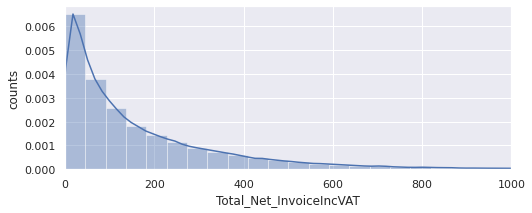

In [28]:
sns.set(color_codes=True)

f, ax = plt.subplots(1,1, figsize=(8, 3));
ax = sns.distplot(df_transactions.Total_Net_InvoiceIncVAT, kde=True, bins=70)

ax.set(xlim=(0, 1000));
ax.set_ylabel('counts');

**Data Cleaning for Total_Net_InvoiceIncVAT values that equals zero**
In this stage we will drop data with value zero. 

In [25]:
# Get names of indexes for which column Total_Net_InvoiceIncVAT has value equals 0
indexNames = df_transactions.loc[(df_transactions['Total_Net_InvoiceIncVAT']==0)].index

# Delete these row indexes from dataFrame
df_transactions.drop(indexNames , inplace=True )
df_transactions

,dTicketInternalKey,cBrutoValue,BillNo,ItemName,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,CustomerGroup,CustomerNo
0,30860300,11.75,50200,Tnuva Amek Cheese,18.8,-1,13369,0,0
1,30860300,6.00,50200,Healthy Bread Pcs,18.8,0,0,0,0
2,30860300,2.00,50200,Cadbury 5Star 48G,18.8,0,0,0,0
3,30860300,1.00,50200,Nesquik Biscuit Milk 56G,18.8,0,0,0,0
4,30860301,25.00,50201,Marlboro Red,45.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3481787,31755806,30.00,38929,Peanut Butter Ruparels Red 510G,268.9,-1,15967,1,628959
3481788,31755806,20.00,38929,Jericho Water 8*1.5L Case,268.9,-1,16124,1,628959
3481789,31755806,22.00,38929,Alaa Al Deen Tissues 800G 2P,268.9,-1,14084,1,628959
3481790,31755806,40.00,38929,Reema Toilet 32 Roll,268.9,-1,15482,1,628959


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


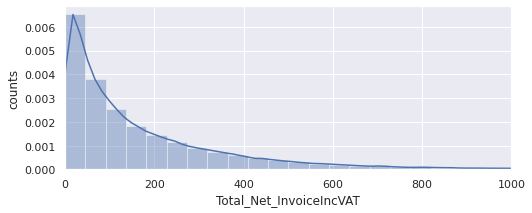

In [ ]:
sns.set(color_codes=True)

f, ax = plt.subplots(1,1, figsize=(8, 3));
ax = sns.distplot(df_transactions.Total_Net_InvoiceIncVAT, kde=True, bins=70)

ax.set(xlim=(0, 1000));
ax.set_ylabel('counts');

In [ ]:
print(df_transactions.Total_Net_InvoiceIncVAT.min(),' - ' ,df_transactions.Total_Net_InvoiceIncVAT.max())

0.05  -  3183.75


In [ ]:
df_transactions[df_transactions.Total_Net_InvoiceIncVAT <.5]

,BravoNo,BillNo,dItemInternalKey,ItemName,TotalBeforeDisc,DiscValue,NetSales_IncVAT,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,CustomerGroup,CustomerNo,day,month,year
2300,1,76365,70483,Mother Day,0.10,0.0,0.10,0.10,0,0,0,0,1,9,2019
16330,2,43247,48291,Bravo Plastic Bags,0.05,0.0,0.05,0.05,0,0,0,0,1,9,2019
75683,2,44209,1748,Roast Beef,36.10,0.0,36.10,0.10,0,0,0,0,3,9,2019
75686,2,44209,74079,Carton Cups 7Oz,16.00,6.0,10.00,0.10,-1,14310,0,0,3,9,2019
75888,2,44272,62456,Roastery 36 Nis,5.05,0.0,5.05,0.05,0,0,0,0,3,9,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445986,1,8974,70483,Mother Day,0.10,0.0,0.10,0.10,0,0,0,0,31,12,2019
3447239,1,32045,50026,Spoons Box,0.01,0.0,0.01,0.05,0,0,0,0,31,12,2019
3447240,1,32045,50028,Kitchen Toliet Roll 1200M,0.03,0.0,0.03,0.05,0,0,0,0,31,12,2019
3447241,1,32045,50039,Shrink-Blue,0.01,0.0,0.01,0.05,0,0,0,0,31,12,2019


**The problem reamins with bills that have values near zero ?!!!**

Check The histogram for Discount

In [ ]:
print(df_transactions.DiscValue.min(),' - ' ,df_transactions.DiscValue.max())

0.0  -  612.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


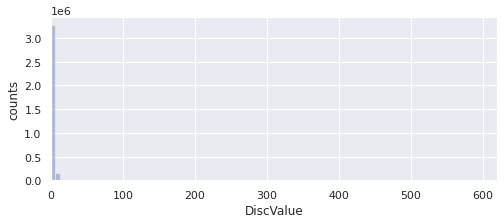

In [ ]:
sns.set(color_codes=True)

f, ax = plt.subplots(1,1, figsize=(8, 3));
ax = sns.distplot(df_transactions.DiscValue, kde=False, bins=100)

ax.set(xlim=(0, 620));
ax.set_ylabel('counts');

From the clean data frame, we will drop unimportant features. Those features are either a repeated data or not useful in the EDA at this stage.

In [26]:
COLUMNS_TO_DROP=['Invoice_Date','Barcode', 'dVendorId' , 'POS_NO','Barcode', 'GrossRetailPrice' ,'Quantity' ,'dVendorId','DeptNo','CashierNo' ,'dItemInternalKey' ,'TotalBeforeDisc',	'DiscValue', 'NetSales_IncVAT']
COUMNS_TO_INCLUDE =['dTicketInternalKey', 'cBrutoValue' , 'BillNo','ItemName','Total_Net_InvoiceIncVAT' ,'bHasPromotions', 'OfferNo' ,'CustomerGroup', 'CustomerNo']
df_transactions= df_clean.filter(COUMNS_TO_INCLUDE)
df_transactions

,dTicketInternalKey,cBrutoValue,BillNo,ItemName,Total_Net_InvoiceIncVAT,bHasPromotions,OfferNo,CustomerGroup,CustomerNo
0,30860300,11.75,50200,Tnuva Amek Cheese,18.8,-1,13369,0,0
1,30860300,6.00,50200,Healthy Bread Pcs,18.8,0,0,0,0
2,30860300,2.00,50200,Cadbury 5Star 48G,18.8,0,0,0,0
3,30860300,1.00,50200,Nesquik Biscuit Milk 56G,18.8,0,0,0,0
4,30860301,25.00,50201,Marlboro Red,45.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3481787,31755806,30.00,38929,Peanut Butter Ruparels Red 510G,268.9,-1,15967,1,628959
3481788,31755806,20.00,38929,Jericho Water 8*1.5L Case,268.9,-1,16124,1,628959
3481789,31755806,22.00,38929,Alaa Al Deen Tissues 800G 2P,268.9,-1,14084,1,628959
3481790,31755806,40.00,38929,Reema Toilet 32 Roll,268.9,-1,15482,1,628959


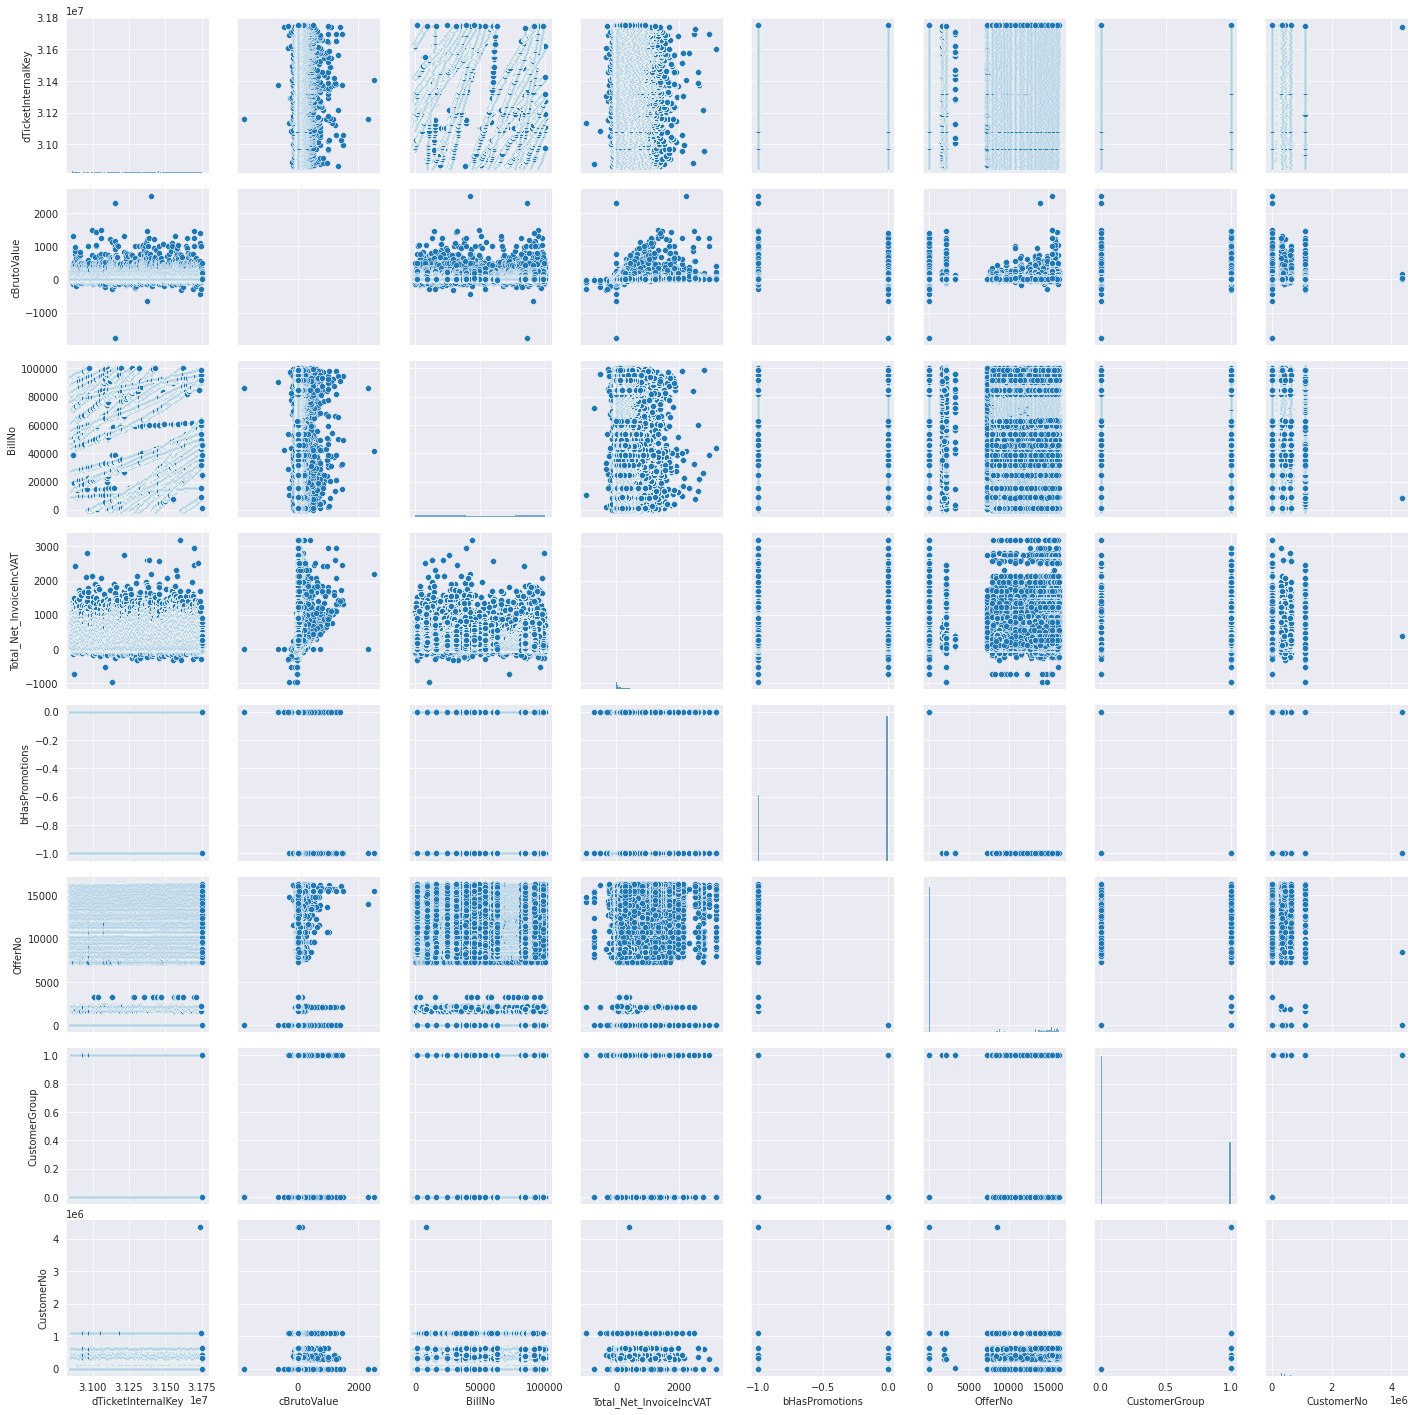

In [11]:
sns.set_style('darkgrid')
sns.pairplot(df_transactions)

## Statistical Question:

---




### Q1: What are the Precentage of transactions per Customer Group?




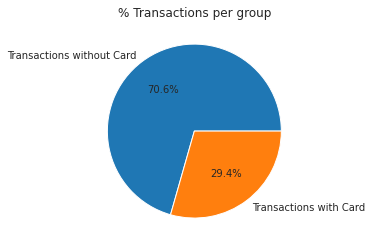

In [27]:

ax = df_transactions.CustomerGroup.value_counts().plot.pie(labels=['Transactions without Card','Transactions with Card'],autopct='%.1f%%')
ax.set_title('% Transactions per group')
ax.set_ylabel('');

he above figure shows clearly that the customer group 0 is dominentet with about 2.5 M customer, while the customer group 1 is about 1 M. The majority of the customers in the dataset are not rejesterd, i.e they don't have an ID, and hence, there is no history for their payments.

The above figure shows clearly that the customer group 0 is dominentet with about 2.5 M customer, while the customer group 1 is about 1 M. The majority of the customers in the dataset are not rejesterd, i.e they don't have an ID, and hence, there is no history for their payments. 

### **Q2: What are the sales tickets (invoices) per each customer group?**




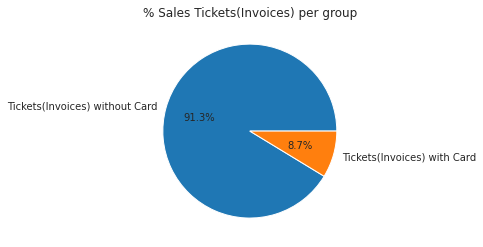

In [28]:

uniqueTickets =df_transactions.drop_duplicates("dTicketInternalKey")
ax =uniqueTickets.CustomerGroup.value_counts().plot.pie(labels=['Tickets(Invoices) without Card','Tickets(Invoices) with Card'],autopct='%.1f%%')
ax.set_title('% Sales Tickets(Invoices) per group')
ax.set_ylabel('');

Tickets don't have Bravo Thank you card **(CustomerGroup=zero)** have a percentage with **91.3%** while the Tickets have Bravo Card (CustomerGroup=one) are only about **8.7%.**

### **Q3: What are the monthly purchases for customers?**


Text(0.5, 0, 'Fequency of paymnets')

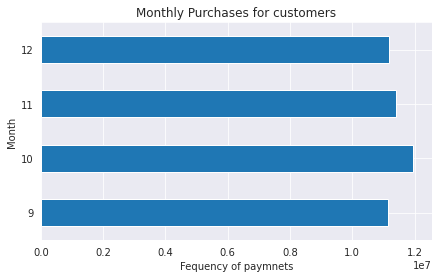

In [31]:
f, ax = plt.subplots(1,1, figsize=(7, 4));
df_monthly_purchases=df_clean.groupby(['month'])
ax =df_monthly_purchases['cBrutoValue'].sum().plot.barh(rot=0,title='Monthly Purchases for customers')
ax.set_ylabel("Month")
ax.set_xlabel("Fequency of paymnets")


The differences between the monthly parchases are subtle,as the max number of purchases is in october.

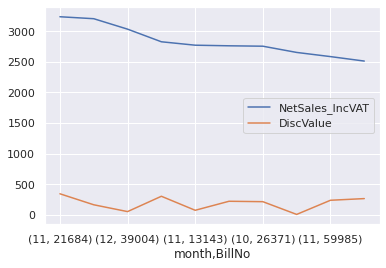

In [ ]:
df_res =df_transactions.groupby(['month','BillNo'])[['NetSales_IncVAT','DiscValue']].sum().sort_values(ascending=False, by='NetSales_IncVAT').head(10).plot(kind='line')


 Q2: Is there a relationship between Total_Net_InvoiceIncVAT and customer groups?

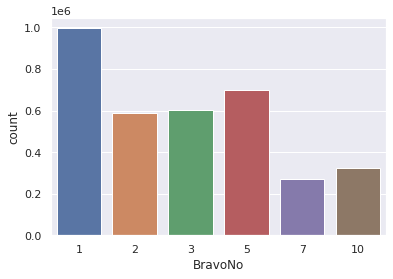

In [ ]:
sns.countplot(df_clean.BravoNo)

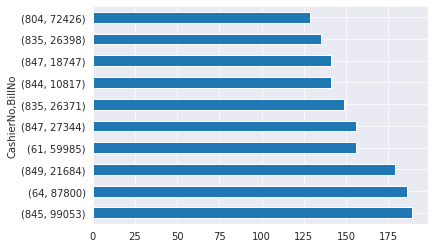

In [13]:
df_clean.groupby('CashierNo')['BillNo'].value_counts().nlargest(10).plot.barh()

### **Q4: What are the items count with promotion/ items without promotion?** 

for each bill?

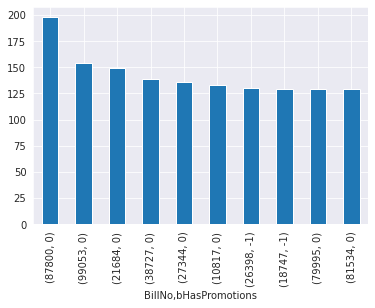

In [34]:
df_bell_items_group = df_clean.groupby(['BillNo', 'bHasPromotions'])

df_bell_items_group['ItemName'].count().nlargest(10).plot(kind='bar')

### **Q5: What are the Net Sales sum for items with promotion/ items without promotion in each bill?**

### **Q7: Is there any item that included in more than one offer?**

In [ ]:
df_clean [df_clean.OfferNo == 0]['CustomerGroup'].unique() # Offer No zero is related to both Customer Groups

### Q8: What are the top relatead items (bought togther)?

### Q9 :What are the related items bought by customers?


### Q10 :What is the relation between item discount percentage and number of payments?

### Q11: What are the frequent items for each customer in all orders?

### Q12: When do customers prefer to shop?

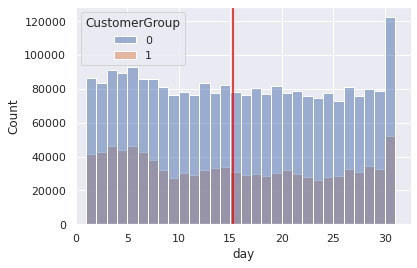

In [ ]:

ax=sns.histplot(df_clean, x=df_clean.day, hue=df_clean.CustomerGroup ,bins=30)
plt.xlim(0, None)
plt.ylim(0,None)
plt.axvline(x=df_clean.day.dropna().mean(),color='red')


### Q13:Which are the top 20 best-selling products?


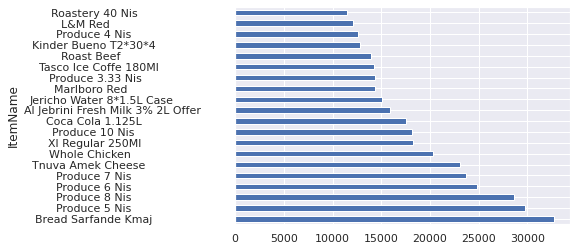

In [ ]:
df_bell_products= df_clean.groupby('ItemName')
df_bell_products['BillNo'].count().nlargest(20).plot.barh()

###Q14:What are the minimum and maximum orders received from customers?


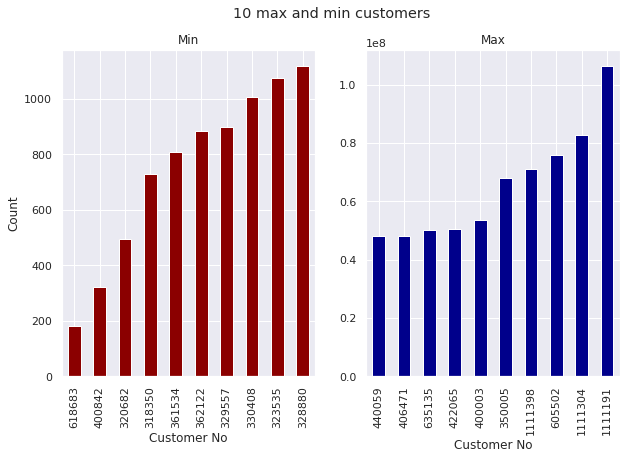

In [ ]:
def top10_subplot(volatility_series, title):
    # Making the subplot and the figure for two side by side plots
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotting with pandas the barchart for the top 10 losers
    ax = (volatility_series.head(10).plot.bar(color="darkred", ax=axes[0], title='Min'))
    
    # Setting the figure's main title to the text passed as parameter
    # ... YOUR CODE FOR TASK 7 ...
    fig.suptitle(title)
    
    # Setting the ylabel to '% change'
    # ... YOUR CODE FOR TASK 7 ...
    ax.set_ylabel("Count")
    ax.set_xlabel("Customer No")
    # Same as above, but for the top 10 winners
    ax = (volatility_series.tail(10).plot.bar(color="darkblue", ax=axes[1], title= 'Max'))
    ax.set_xlabel("Customer No")
   
    
    # Returning this for good practice, might use later
    return fig, ax

DTITLE = "10 max and min customers"

# Calling the function above with the 24 hours period series and title DTITLE  
df_customers_bills_count= df_clean[df_clean.CustomerGroup==1].groupby('CustomerNo')
df_res =df_customers_bills_count['BillNo'].sum().sort_values()
fig, ax = top10_subplot(df_res, DTITLE)